<a href="https://colab.research.google.com/github/jpriyanshii/LSTM/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout

Saving covid19.csv to covid19 (3).csv


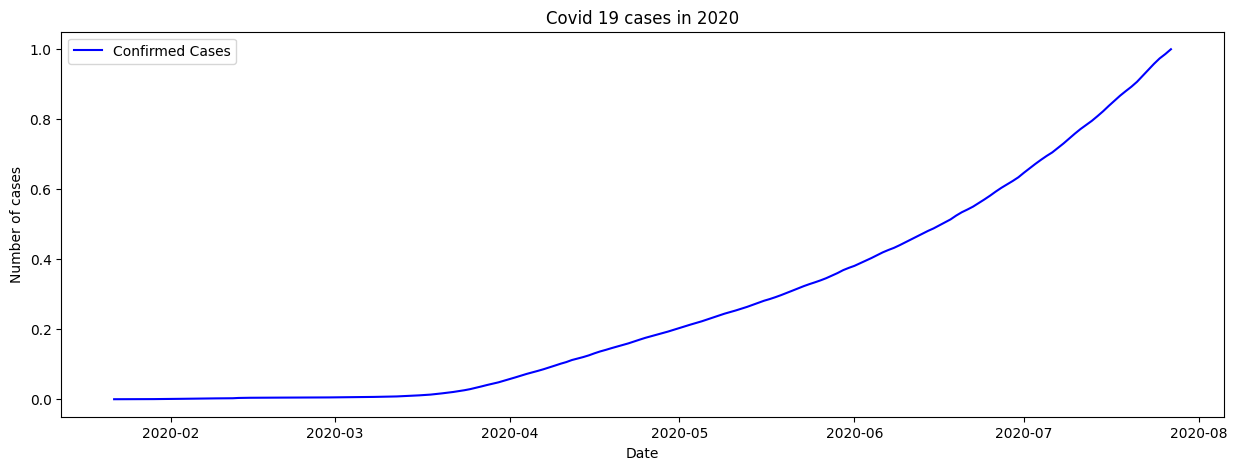

In [ ]:
from google.colab import files

uploaded = files.upload()
df = pd.read_csv("covid19.csv")

scaler = MinMaxScaler(feature_range=(0,1))
df['Confirmed'] = scaler.fit_transform(df[['Confirmed']])

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)
df.sort_index()

plt.figure(figsize=(15,5))
plt.plot(df['Confirmed'], label='Confirmed Cases', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.title('Covid 19 cases in 2020')
plt.legend()
plt.show()


In [ ]:
time_step = 30
x, y = [], []
for i in range(len(df)-time_step):
    x.append(df['Confirmed'].iloc[i:i+time_step].values)
    y.append(df['Confirmed'].iloc[i+time_step])

x, y = np.array(x), np.array(y)
print(x.shape)
print(y.shape)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))  #reshapes to (samples, time steps, features)
print(f"New x shape: {x.shape}")

(158, 30)
(158,)
New x shape: (158, 30, 1)


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2, random_state = 0)
print("xtrain shape : ", xtrain.shape)
print("xtest shape  : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape  : ", ytest.shape)

xtrain shape :  (126, 30, 1)
xtest shape  :  (32, 30, 1)
ytrain shape :  (126,)
ytest shape  :  (32,)


In [ ]:
model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(30,1)),
    LSTM(units=100, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_absolute_error')
model.fit(xtrain, ytrain, epochs=250, batch_size=20)

Epoch 1/250


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.1644
Epoch 2/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0622
Epoch 3/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0285
Epoch 4/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0281
Epoch 5/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0297
Epoch 6/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0379
Epoch 7/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0167
Epoch 8/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0123
Epoch 9/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0097
Epoch 10/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0112
Epoch 11/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0115
Epoch 12/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0082
Epoch 13/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0107
Epoch 14/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0101
Epoch 15/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0107
Epoch 16/250
7/7 ━━━━━━━━━━━━━━

In [ ]:
predictions = model.predict(xtest)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(ytest.reshape(-1,1))

mae = mean_absolute_error(y_test_actual, predictions)
print(f"Test MAE: {mae:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
Test MAE: 153753.7202


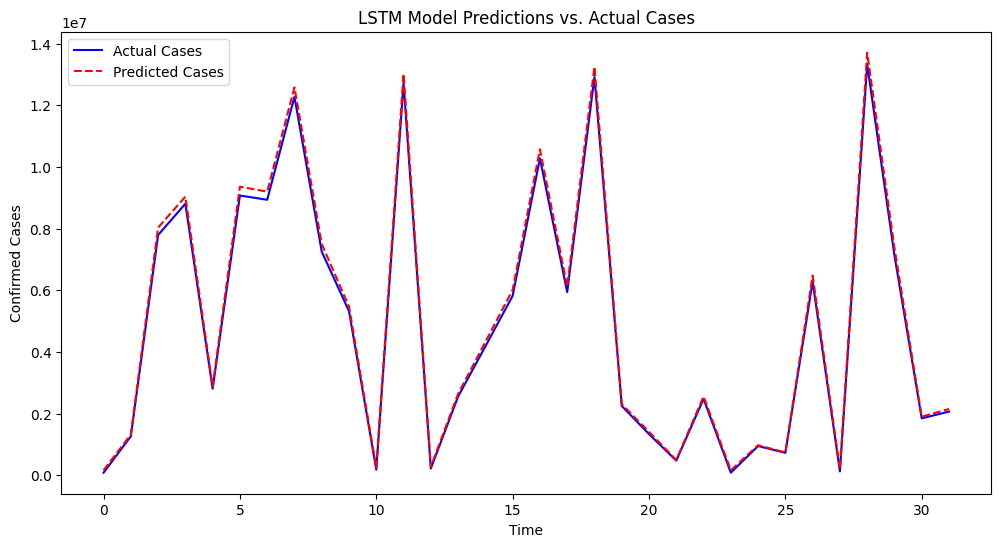

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label="Actual Cases", color='blue')
plt.plot(predictions, label="Predicted Cases", color='red', linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Confirmed Cases")
plt.title("LSTM Model Predictions vs. Actual Cases")
plt.legend()
plt.show()